Team Members:\
Aryaman Gokarn(506303588)\
Mugdha Bhagwat(606297799)\
Tania Rajabally(806153219)


In [ ]:
#Installing the required packages
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [ ]:
if (!requireNamespace("googledrive", quietly = TRUE)) {
  install.packages("googledrive")
}
library(googledrive)

In [ ]:
drive_auth()

In [ ]:
drive_find(type = "application/pdf")

# **2. Google+ network**

## QUESTION 18

In [ ]:
folder_path <- "gplus"

circle_list <- list.files(path = folder_path, pattern = "\\.circles$", full.names = TRUE)

count <- sum(sapply(circle_list, function(file) length(readLines(file)) > 2))

print('Total number of Directed Personal Networks for users with more than 2 circles are:')
print(count)


[1] "Total number of Directed Personal Networks for users with more than 2 circles are:"
[1] 57


QUESTION 18: How many personal networks are there?

Total number of Directed Personal Networks for users with more than 2 circles are: 57

## QUESTION 19

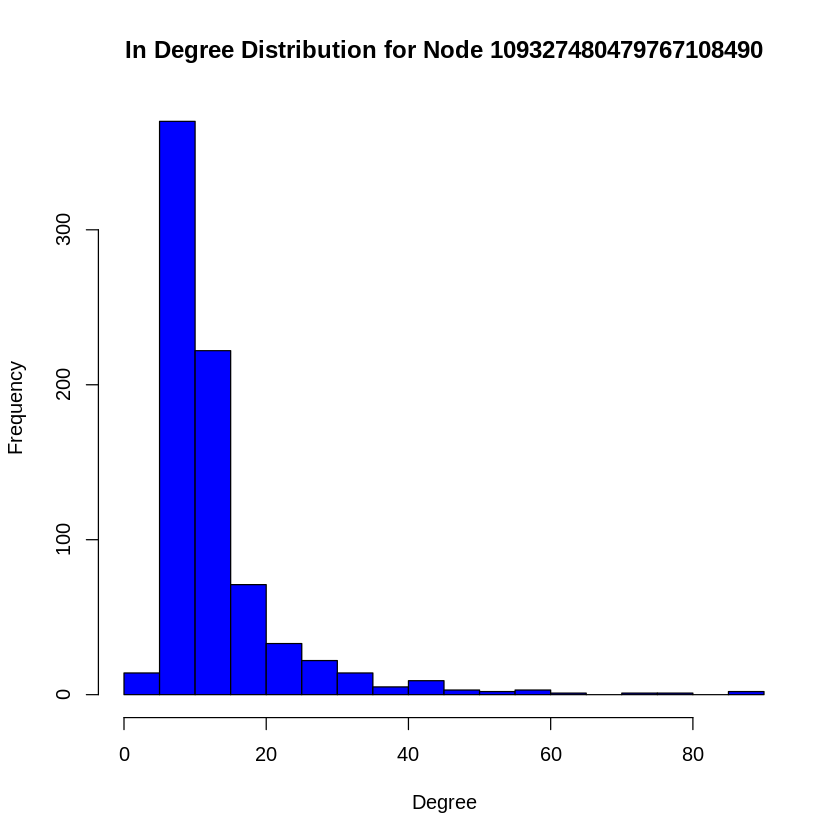

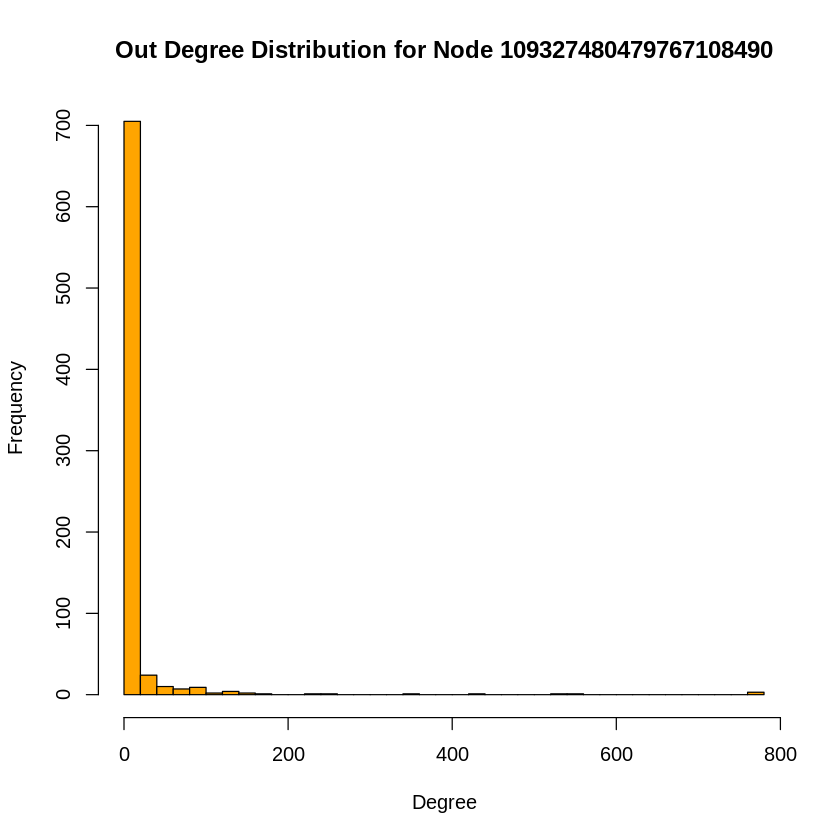

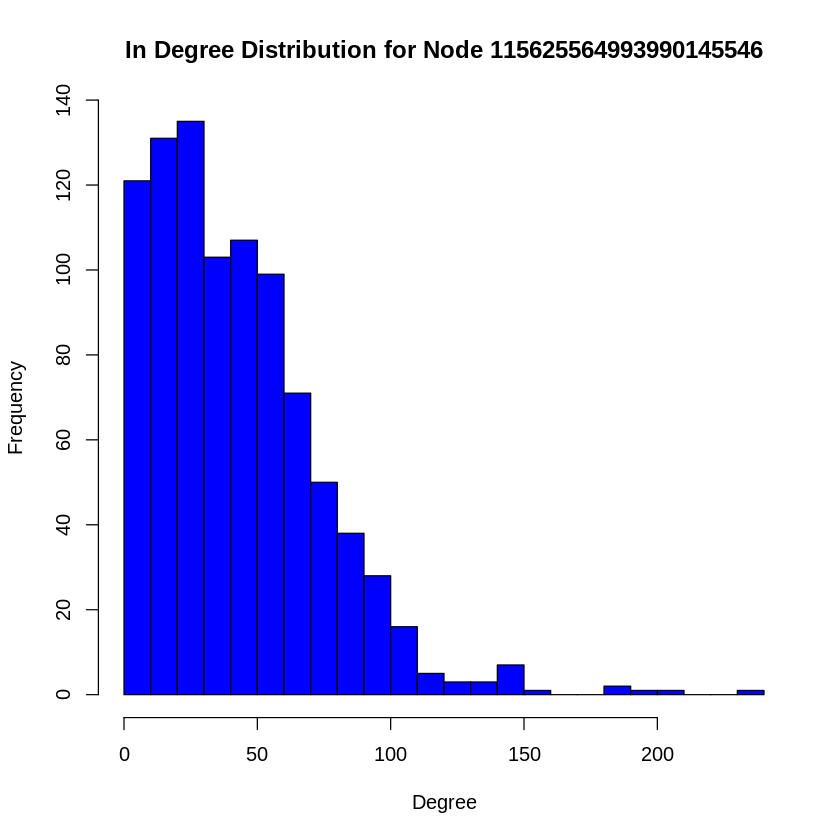

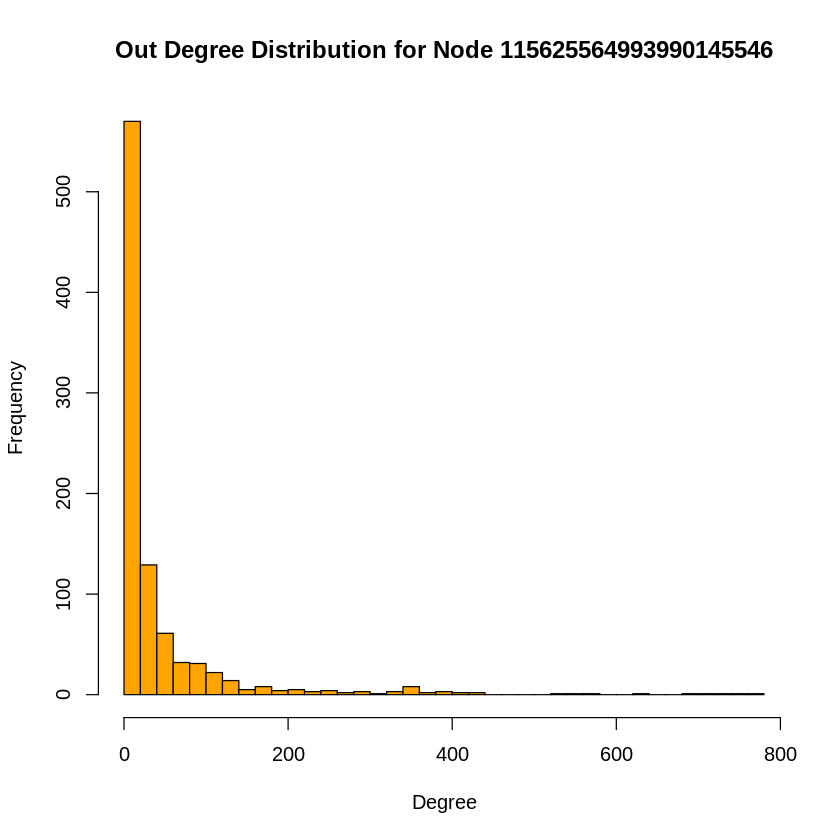

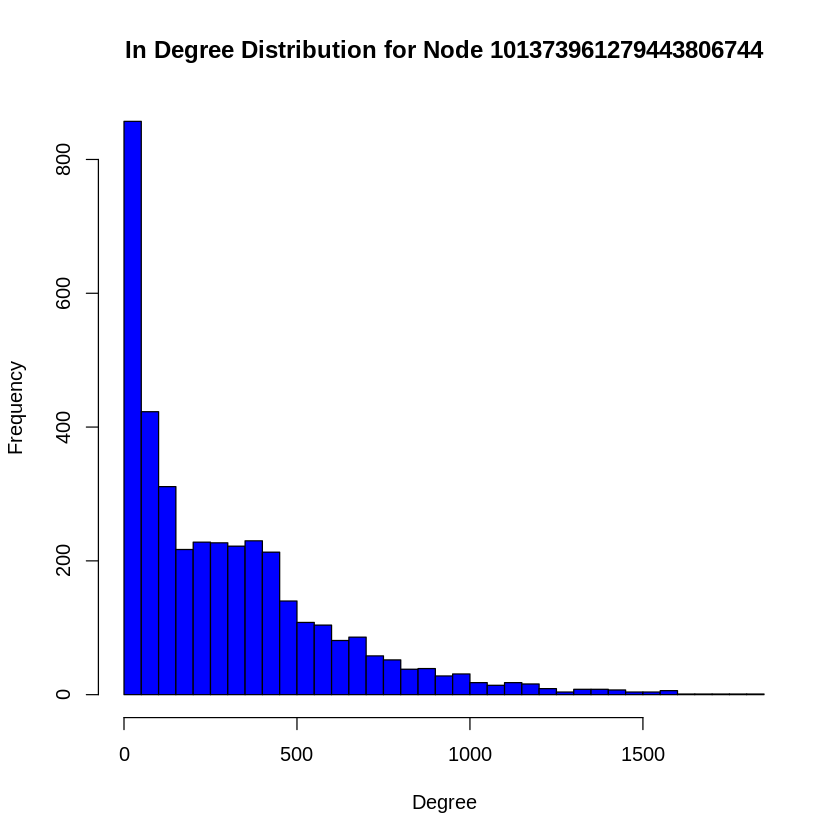

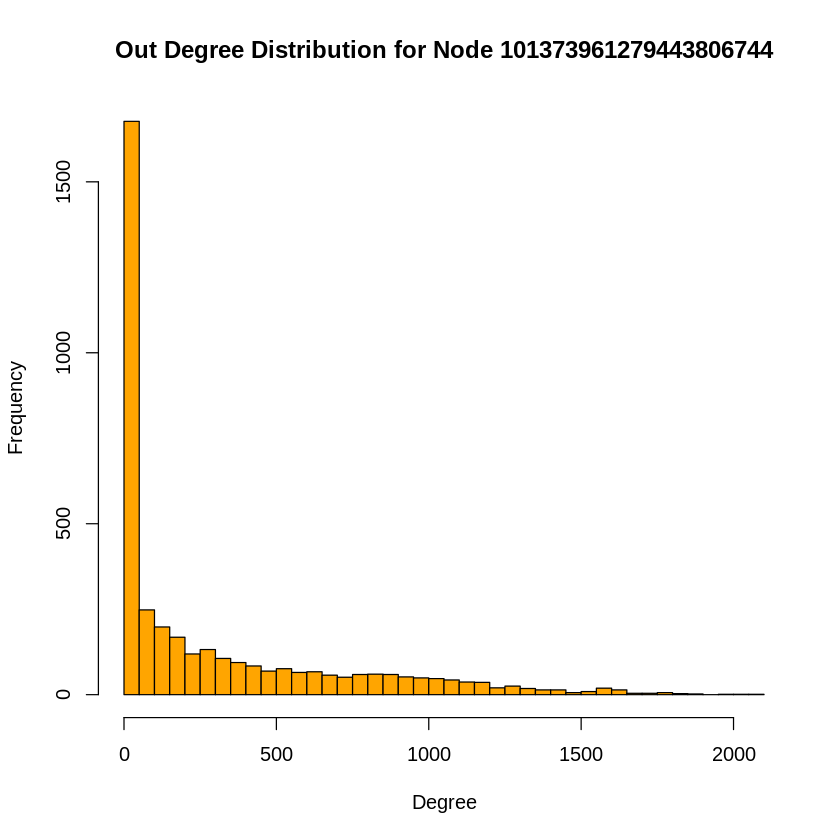

In [ ]:
create_histogram <- function(graph, node_id, direction) {
  hist_data <- degree(graph, mode = direction)

  hist_col <- ifelse(direction == "In", "blue", "orange")

  hist(hist_data, breaks = 30, main = paste(direction, "Degree Distribution for Node", node_id),
       xlab = "Degree", ylab = "Frequency", col = hist_col)
}


gp1_e <- read.table("gplus/109327480479767108490.edges")
gp2_e <- read.table("gplus/115625564993990145546.edges")
gp3_e <- read.table("gplus/101373961279443806744.edges")

gp1 <- graph_from_data_frame(gp1_e, directed = TRUE)
gp2 <- graph_from_data_frame(gp2_e, directed = TRUE)
gp3 <- graph_from_data_frame(gp3_e, directed = TRUE)


create_histogram(gp1, "109327480479767108490", "In")
create_histogram(gp1, "109327480479767108490", "Out")
create_histogram(gp2, "115625564993990145546", "In")
create_histogram(gp2, "115625564993990145546", "Out")
create_histogram(gp3, "101373961279443806744", "In")
create_histogram(gp3, "101373961279443806744", "Out")

In [ ]:
# Function to analyze in-degree and out-degree distributions for a given node
analyze_node_degrees <- function(node_id, edges_folder_path) {
  cat("Node ID:", node_id, "\n")

  node_edges_file <- file.path(edges_folder_path, paste0(node_id, ".edges"))

  edges_df <- read.table(node_edges_file, header = FALSE, col.names = c("from", "to"))

  node_graph <- graph_from_data_frame(d = edges_df, directed = TRUE)

  node_graph <- add_vertices(node_graph, nv = 1, name = node_id)

  node_graph <- add_edges(node_graph, cbind(rep(vcount(node_graph), each = vcount(node_graph) - 1),
                                            seq_len(vcount(node_graph))[-vcount(node_graph)]))

  in_degree <- degree(node_graph, mode = "in")
  out_degree <- degree(node_graph, mode = "out")

  cat("In-degree: \n")
  cat("Mean     =   ", mean(in_degree), "\n")
  cat("Variance =   ", var(in_degree), "\n")


  cat("Out-degree: \n")
  cat("Mean     =   ", mean(out_degree), "\n")
  cat("Variance =   ", var(out_degree), "\n\n")
}

In [ ]:
nodes_list <- c("109327480479767108490", "115625564993990145546", "101373961279443806744")

edges_folder_path <- "gplus"

for (node_id in nodes_list) {
  analyze_node_degrees(node_id, edges_folder_path)
}

Node ID: 109327480479767108490 
In-degree: 
Mean     =    14.06202 
Variance =    274.8241 
Out-degree: 
Mean     =    14.06202 
Variance =    4026.402 

Node ID: 115625564993990145546 
In-degree: 
Mean     =    43.63961 
Variance =    1206.213 
Out-degree: 
Mean     =    43.63961 
Variance =    8701.524 

Node ID: 101373961279443806744 
In-degree: 
Mean     =    298.1182 
Variance =    87059.55 
Out-degree: 
Mean     =    298.1182 
Variance =    163623.3 




QUESTION 19: For the 3 personal networks (node ID given below), plot the in-degree and out- degree distribution of these personal networks. Do the personal networks have a similar in and out degree distribution? In this question, you should have 6 plots.
* 109327480479767108490
* 115625564993990145546
* 101373961279443806744

To answer this question we employed the following:

1. Plotting In-Degree and Out-Degree Distributions:
For each of the three personal networks with the given node IDs, we create histograms to visualize the distribution of in-degrees and out-degrees. In total, we generate six plots: three for in-degree distributions and three for out-degree distributions.
2. Comparing In-Degree and Out-Degree Distributions:
After plotting the distributions, we examine whether the personal networks exhibit similar patterns in their in-degree and out-degree distributions. We look for similarities or differences in the shapes, central tendencies, and spreads of the distributions across the networks.
3. Interpretation:
If the histograms for in-degree and out-degree distributions of the three personal networks show similar shapes, peaks, and spreads, it suggests that the networks have comparable patterns of connectivity. Conversely, if there are notable differences between the distributions, it indicates variations in the way nodes within each network receive and send connections.


1. Overall Similarity in Distributions:
  The in-degree and out-degree distributions for each node ID across the three personal networks exhibit notable similarities. Both the in-degree and the out-degree follow the Power-law behaviour. At the same time based on the central tendencies we observe that they have a very close values. We also see that the last node index in the graphs tends to have very high out-degree values and approximate zero in-degree values. This phenomenon arises because each node is following all other nodes in the network, resulting in a high out-degree but minimal in-degree for these nodes.

2. Differences Across Networks:
   While the distributions may appear similar at a high level, closer examination reveals distinct characteristics for each network:
   - Network Complexity: The third network demonstrates the highest in-degree and out-degree values overall, indicating the strongest connections between nodes. Conversely, the first network exhibits lower in-degree and out-degree values compared to the other two networks, suggesting simpler connectivity patterns.
   - Strength of Connections: The second network displays stronger connections between nodes compared to the first network, as evidenced by higher in-degree and out-degree values. Moreover, the third network stands out for its particularly strong connections, indicating a higher level of complexity and interconnectivity.

3. Variation in In-Degree and Out-Degree Distributions:
   - Out-Degree Distribution: All three networks exhibit similar out-degree distributions, following a power-law distribution. However, slight variations exist, with the out-degree distribution of the first network skewed slightly more to the right.
   - In-Degree Distribution: While the in-degree distributions also demonstrate power-law behavior, there are noticeable differences among the networks. For instance, the in-degree distribution of the second network appears roughly linear, indicating a distinct connectivity pattern compared to the other networks.
   - Interpreting Network Characteristics: The differences in in-degree and out-degree distributions offer insights into network characteristics. For example, the network with node 115625564993990145546 forms communities with strong internal connections and sparse inter-community connections, whereas the network with node 101373961279443806744 lacks clear community structures and exhibits low modularity, as indicated by the slow roll-off in the out-degree distribution.

In summary, while the in-degree and out-degree distributions demonstrate some similarities across the three personal networks, there are notable differences in network complexity, strength of connections, and distribution characteristics. These differences reflect unique structural and connectivity patterns within each network, highlighting the diverse nature of personal networks and their underlying dynamics.


# 1. Community structure of personal networks

## QUESTION 20

In [ ]:
gp1_e <- read.table("gplus/109327480479767108490.edges")
gp2_e <- read.table("gplus/115625564993990145546.edges")
gp3_e <- read.table("gplus/101373961279443806744.edges")

gp1 <- graph_from_data_frame(gp1_e, directed=TRUE)
gp2 <- graph_from_data_frame(gp2_e, directed=TRUE)
gp3 <- graph_from_data_frame(gp3_e, directed=TRUE)

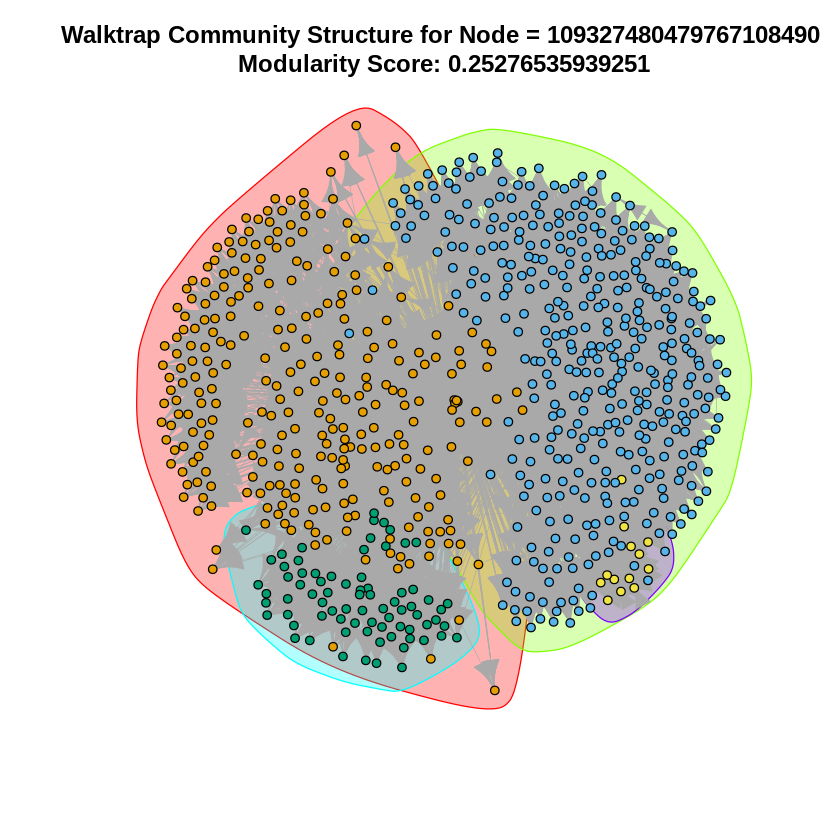

In [ ]:
add_node_edges <- function(graph, node_id) {
  graph <- graph + vertex(node_id)

  for (i in 1:(vcount(graph) - 1)) {
    graph <- graph + edge(vcount(graph), i)
  }

  return(graph)
}

plot_community_structure <- function(graph, walktrap_result, node_id, modularity_value) {
  plot(graph, mark.groups = walktrap_result, edge.width = 0.5, vertex.size = 3,
       vertex.color = walktrap_result$membership, vertex.label = "",
       main = paste("Walktrap Community Structure for Node =", node_id, "\nModularity Score:", modularity_value))
}

gp1 <- graph.data.frame(gp1_e, directed = TRUE)

node_id <- "109327480479767108490"

gp1 <- add_node_edges(gp1, node_id)

wt1 <- cluster_walktrap(gp1)

modularity_value <- modularity(wt1)

plot_community_structure(gp1, wt1, node_id, modularity_value)

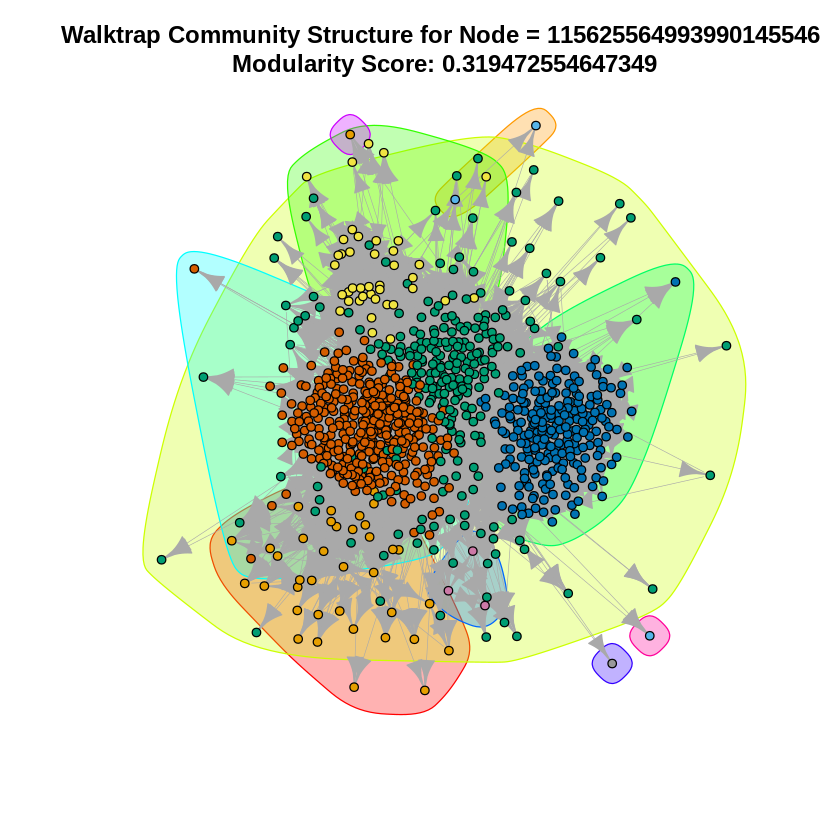

In [ ]:
add_node_edges <- function(graph, node_id) {
  graph <- graph + vertex(node_id)

  for (i in 1:(vcount(graph) - 1)) {
    graph <- graph + edge(vcount(graph), i)
  }

  return(graph)
}

plot_community_structure <- function(graph, walktrap_result, node_id, modularity_value) {
  plot(graph, mark.groups = walktrap_result, edge.width = 0.5, vertex.size = 3,
       vertex.color = walktrap_result$membership, vertex.label = "",
       main = paste("Walktrap Community Structure for Node =", node_id, "\nModularity Score:", modularity_value))
}

gp2 <- graph.data.frame(gp2_e, directed = TRUE)

node_id <- "115625564993990145546"

gp2 <- add_node_edges(gp2, node_id)

wt2 <- cluster_walktrap(gp2)

modularity_value <- modularity(wt2)

plot_community_structure(gp2, wt2, node_id, modularity_value)

In [ ]:
add_node_edges <- function(graph, node_id) {
  graph <- graph + vertex(node_id)

  for (i in 1:(vcount(graph) - 1)) {
    graph <- graph + edge(vcount(graph), i)
  }

  return(graph)
}

plot_community_structure <- function(graph, walktrap_result, node_id, modularity_value) {
  plot(graph, mark.groups = walktrap_result, edge.width = 0.5, vertex.size = 3,
       vertex.color = walktrap_result$membership, vertex.label = "",
       main = paste("Walktrap Community Structure for Node =", node_id, "\nModularity Score:", modularity_value))
}

gp3 <- graph.data.frame(gp3_e, directed = TRUE)

node_id <- "101373961279443806744"

gp3 <- add_node_edges(gp3, node_id)

wt3 <- cluster_walktrap(gp3)

modularity_value <- modularity(wt3)

plot_community_structure(gp3, wt3, node_id, modularity_value)

Warning message:
“`graph.data.frame()` was deprecated in igraph 2.0.0.
ℹ Please use `graph_from_data_frame()` instead.”


In [ ]:
gp3 <- graph.data.frame(gp3_e, directed=TRUE)
gp3 = gp3 + vertex("101373961279443806744")
for (i in seq(1, vcount(gp3)-1,1)){
  gp3 = gp3 + edge(vcount(gp3), i)
}
wt3 <- cluster_walktrap(gp3)
modularity(wt3)
plot(gp3,mark.groups = wt3,edge.width=0.5,vertex.size=3,vertex.color=wt3$membership,vertex.label="",main = "Walktrap Community Structure for Node = 101373961279443806744 \nModularity Score:", modularity(wt3))
dev.copy2pdf(file="Q20c.pdf")

In [ ]:
gp3 <- graph_from_data_frame(gp3_e, directed=TRUE)
gp3 = gp3 + vertex("101373961279443806744")
for (i in seq(1, vcount(gp3)-1,1)){
  gp3 = gp3 + edge(vcount(gp3), i)
}
wt3 <- cluster_walktrap(gp3)
modularity(wt3)
plot(gp3,mark.groups = wt3,edge.width=0.5,vertex.size=3,vertex.color=wt3$membership,vertex.label="",main = "Walktrap Community Structure for Node = 101373961279443806744")

ERROR: Error in graph_from_data_frame(gp3_e, directed = TRUE): could not find function "graph_from_data_frame"


Warning message in graph_from_data_frame(d = d, directed = directed, vertices = vertices):
“In `d' `NA' elements were replaced with string "NA"”


[1] 0.1617592

png 
  2

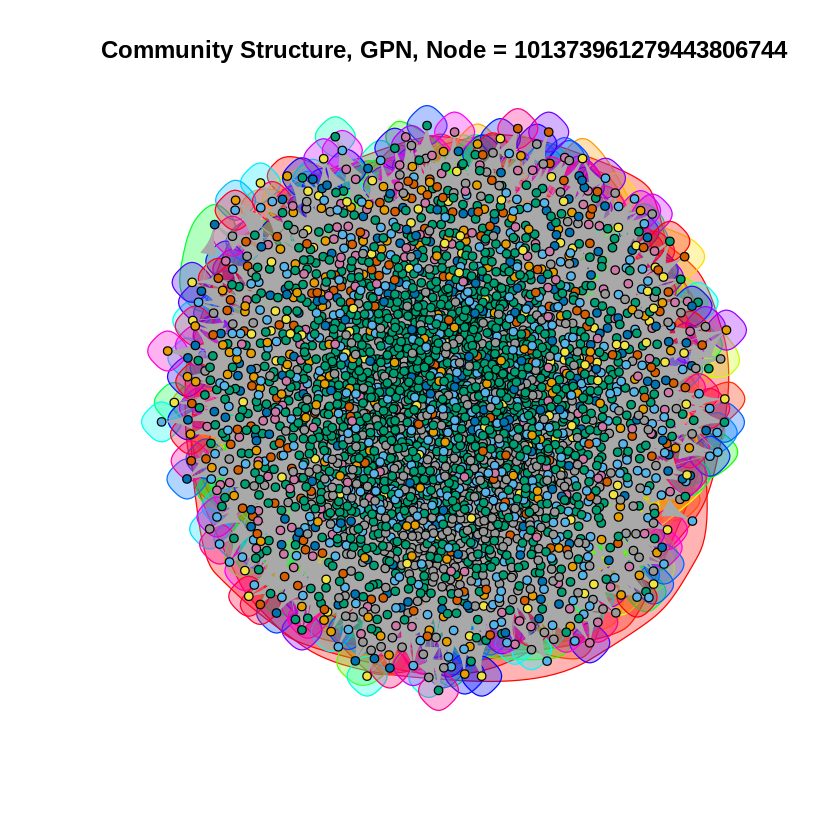

In [ ]:
gp3 <- graph.data.frame(gp3_e, directed=TRUE)
gp3 = gp3 + vertex("101373961279443806744")
for (i in seq(1, vcount(gp3)-1,1)){
  gp3 = gp3 + edge(vcount(gp3), i)
}
wt3 <- cluster_walktrap(gp3)
modularity(wt3)
plot(gp3,mark.groups = wt3,edge.width=0.5,vertex.size=3,vertex.color=wt3$membership,vertex.label="",main = "Community Structure, GPN, Node = 101373961279443806744")
dev.copy2pdf(file="Q20c.pdf")

QUESTION 20: For the 3 personal networks picked in Question 19, extract the community structure of each personal network using Walktrap community detection algorithm. Report the modularity scores and plot the communities using colors. Are the modularity scores similar? In this question, you should have 3 plots.

The modularity scores and community structures for the three nodes provide insights into their network characteristics and connectivity patterns.

Node 101373961279443806744 has the lowest modularity score of 0.19109, indicating that the network is less capable of being divided into densely packed modules with strong connectedness and sparse interconnections among communities. In the above figure most nodes in this network are grouped in a single chunk in the center, suggesting weak community structures and extensive interconnectivity. This network also exhibits the highest number of edges and nodes among all networks, which may contribute to the loss of global sparsity among communities, weakening the community structures.

We also observed that the personalized network for node 101373961279443806744 has the highest number of edges m and nodes among all networks. Intuitively, a higher value of indicates that an incoming node is connected to a larger number of older nodes. While this should result in strong intra-community connectedness, the global sparsity among different communities is lost due to the connectedness requirement brought on by high values of m, resulting in edges being formed among otherwise distinct clusters and hence weakening the community structures.

If the number of edges m in the network (not to be confused with the actual m we are talking about, which is the number of old nodes the incoming node connects with) increases, then Q(P) drops. As a result, less clusters are formed in the overall graph.

On the other hand, Node 115625564993990145546 boasts the highest modularity score of 0.31947. Its figure illustrates dense communities or clusters with sparse interconnectivity among them. This high modularity score signifies stronger connections within communities and weaker connections between communities.

For Node 109327480479767108490, the modularity score is 0.25278, indicating intermediate community structure. While not as strong as Node 115625564993990145546, it exhibits stronger community structures compared to Node 101373961279443806744.

In summary, the second node demonstrates the highest modularity score, suggesting well-defined community clustering with strong intra-community connections and weak inter-community connections. Conversely, the third node exhibits complex connections, resulting in strong inter-community connections and a lower modularity score.

One thing to note is that, from the previous graphs that the three personal networks have quite similar indegree and outdegree distribution for each node ID (the last node index in the graphs) of the personal network. The node ID has a very high out-degree and an approximate zero in-degree. This is because for each node ID of that personal network, the node is following all the other nodes in the graph, so the outdegree is equal to the number of nodes in that network. The modularity scores and community structures highlight the varying degrees of community organization and connectivity patterns across the three nodes, providing valuable insights into their network dynamics and structures.


## QUESTION 21

QUESTION 21: Based on the expression for h and c, explain the meaning of homogeneity and
completeness in words.

Homogeneity (h) measures the extent to which the communities (K) are able to capture the diversity of circles (C). It quantifies how well the communities represent the circles. A high homogeneity score indicates that the communities effectively capture the diversity of circles, meaning that individuals within the same community tend to belong to similar circles. Conversely, a low homogeneity score suggests that the communities poorly represent the diversity of circles, indicating that individuals within the same community may belong to a wide range of circles. In other words, homogeneity evaluates the consistency of circle memberships within communities and measures the purity of the community structure. When the community is composed of nodes coming from the same circle, the homogeneity reaches a higher score.

Completeness (c) measures the extent to which the circles (C) are able to capture the diversity of communities (K). It quantifies how well the circles represent the communities. A high completeness score indicates that the circles effectively capture the diversity of communities, meaning that individuals within the same circle tend to belong to similar communities. On the other hand, a low completeness score suggests that the circles poorly represent the diversity of communities, indicating that individuals within the same circle may belong to a wide range of communities. In essence, completeness evaluates the consistency of community memberships within circles and measures the purity of the circle. When the circle assigns nodes to the same community, the completeness scores become higher.



## QUESTION 22

In [ ]:
install.packages("entropy")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
nodes_list <- c("109327480479767108490", "115625564993990145546", "101373961279443806744")

for (node in nodes_list) {
    cat(sprintf("Node ID: %s\n", node))

    node_circles_file_name <- paste("gplus/", node, ".circles", sep = "")
    node_circles_file_content <- readLines(node_circles_file_name)

    circles <- list()
    for (var in 1:length(node_circles_file_content)) {
        circle_nodes <- strsplit(node_circles_file_content[var], "\t")
        circles <- c(circles, list(circle_nodes[[1]][-1]))
    }

    all_circles <- unlist(circles)
    N <- length(unique(all_circles))

    h_c <- 0
    for (circle in circles){
        a_i <- length(circle)
        h_c <- h_c - ((a_i / N) * log10(a_i / N))
    }

    node_edges_file <- paste("gplus/", node, ".edges", sep = "")
    edges <- readLines(node_edges_file)
    graph_edges <- matrix(ncol = 2, nrow = length(edges), byrow = TRUE)
    for (i in 1:length(edges)) {
        edge <- strsplit(edges[i], " ")[[1]]
        graph_edges[i,] <- edge
    }

    node_graph <- graph_from_edgelist(graph_edges, directed = TRUE)
    node_graph <- add_vertices(node_graph, nv = 1, name = node)

    node_community <- walktrap.community(node_graph)

    h_ck <- 0
    h_kc <- 0
    h_k <- 0

    for (m in 1:max(node_community$membership)) {
        community_nodes <- V(node_graph)$name[node_community$membership == m]
        b_i <- length(intersect(community_nodes, all_circles))
        if (b_i != 0) {
            h_k <- h_k - ((b_i / N) * log10(b_i / N))
            for (n in 1:length(circles)) {
                common_nodes <- intersect(community_nodes, circles[[n]])
                c_ij <- length(unique(common_nodes))
                A_i <- length(circles[[n]])
                if (c_ij != 0) {
                    h_ck <- h_ck - ((c_ij / N) * log10(c_ij / b_i))
                    h_kc <- h_kc - ((c_ij / N) * log10(c_ij / A_i))
                }
            }
        }
    }

    homogenity <- 1 - (h_ck / h_c)
    completeness <- 1 - (h_kc / h_k)
    v_measure <- 2 * (homogenity * completeness) / (homogenity + completeness)

    print(sprintf("Entropy H(C) = %5.8f", h_c))
    print(sprintf("Entropy H(K) = %5.8f", h_k))
    print(sprintf("Conditional Entropy H(C|K) = %5.8f", h_ck))
    print(sprintf("Conditional Entropy H(K|C) = %5.8f", h_kc))

    print(sprintf("Homogeneity h = %5.8f", homogenity))
    print(sprintf("Completeness c = %5.8f", completeness))

    print(sprintf("V-measure V = %5.8f", v_measure))
    cat("\n")
    cat("\n")
}


Node ID: 109327480479767108490
[1] "Entropy H(C) = 0.45634767"
[1] "Entropy H(K) = 0.43733067"
[1] "Conditional Entropy H(C|K) = 0.06206141"
[1] "Conditional Entropy H(K|C) = 0.28614882"
[1] "Homogeneity h = 0.86400411"
[1] "Completeness c = 0.34569232"
[1] "V-measure V = 0.49380915"


Node ID: 115625564993990145546
[1] "Entropy H(C) = 3.67636649"
[1] "Entropy H(K) = 0.45911464"
[1] "Conditional Entropy H(C|K) = 2.04794004"
[1] "Conditional Entropy H(K|C) = 2.00895608"
[1] "Homogeneity h = 0.44294454"
[1] "Completeness c = -3.37571773"
[1] "V-measure V = 1.01968725"


Node ID: 101373961279443806744
[1] "Entropy H(C) = 0.16690804"
[1] "Entropy H(K) = 0.23234634"
[1] "Conditional Entropy H(C|K) = 0.16660105"
[1] "Conditional Entropy H(K|C) = 0.60625261"
[1] "Homogeneity h = 0.00183925"
[1] "Completeness c = -1.60926257"
[1] "V-measure V = 0.00368271"




QUESTION 22: Compute the h and c values for the community structures of the 3 personal network (same nodes as Question 19). Interpret the values and provide a detailed explanation. Are there negative values? Why?

From the above values we make the following observations:

1. The network associated with node ID 109327480479767108490 exhibits a notably high homogeneity score. This suggests that within each community, the majority of users are derived from the same circle. Although the completeness score is lower, it remains positive, implying that some users from one circle may have been placed in different communities. This is visible in Figure from Q20, where some orange dots are assigned to communities other than red. Despite this, the completeness score is comparatively higher than the other networks, indicating a relatively well-segregated arrangement of members into distinct communities with minimal overlap.

2. In contrast, the network linked to node ID 115625564993990145546 displays a significantly lower homogeneity score, almost half of that observed in the preceding network. This suggests a greater number of users from various circles have been incorrectly grouped into a single community. This misclassification is evident from the community structure plot in Figure from Question 20. Additionally, the completeness score is low and negative, indicating potential issues such as some circles remaining unassigned to any community, resulting in communities with few circles and a considerable mismatch between the number of circles and communities.

3. Finally, for the network associated with node ID 101373961279443806744, the homogeneity score is the lowest among the three networks, indicating a prevalent misclassification of users from different circles into a single community. This aligns with the low modularity scores, indicating difficulties in forming dense communities with sparse inter-community connections, suggesting insufficient community separation. While the completeness score remains negative, it surpasses that of the network with node 115625564993990145546, pointing to a higher degree of misclassification, likely stemming from similar issues discussed previously.

To answer the latter part of the question: yes, we observed negative values for the second and the third node. A negative completeness score can arise due to several factors:

1. Misclassification of Nodes: If nodes from the same circle are scattered across multiple communities or if nodes from different circles are grouped together within a single community, it can lead to a negative completeness score. This indicates that the clustering algorithm has failed to accurately capture the community structure of the network.

2. Sparse Community Structure: In networks where the community structure is not well-defined or where communities are sparse and poorly separated, the algorithm may struggle to assign nodes to appropriate communities. This can result in incomplete community assignments and, consequently, a negative completeness score.

3. Imbalanced Community Sizes: When the number of communities is much smaller than the number of circles, or when some communities contain significantly fewer nodes than others, it can lead to incomplete coverage of circles within communities. This imbalance can contribute to a negative completeness score.

4. Algorithmic Limitations: Certain community detection algorithms may have inherent limitations that prevent them from accurately capturing the true community structure of a network. For example, algorithms that rely on local information or heuristic approaches may produce suboptimal results in networks with complex or overlapping communities.

5. Data Quality Issues: Inaccurate or incomplete data, such as missing or erroneous node attributes, can adversely affect the performance of community detection algorithms and result in incomplete or incorrect community assignments.

Overall, a negative completeness score indicates a mismatch between the true community structure of the network and the communities identified by the clustering algorithm, highlighting the need for further investigation and potentially more robust algorithmic approaches.
